<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_3%EC%9E%A5_%EB%B6%84%EB%A5%98_p_127_154.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**3.1MNIST**
- MNIST는 머신러닝분야의 'Hello World'라고 불릴 정도로 자주쓰이는 데이터셋

In [23]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

mnist=fetch_openml('mnist_784',version=1, as_frame=False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- DESCR키: 데이터셋 설명
- data 키: 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열
- target 키: 레이블 배열

In [24]:
X,y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


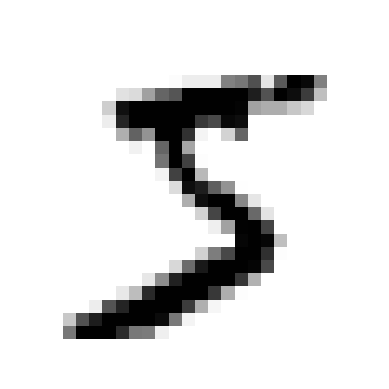

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#28X28로 배열 변경
some_digit = X[0]
some_digit_image=np.array(some_digit).reshape(28,28)

plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [26]:
# 실제레이블 확인
y[0]

'5'

In [27]:
#레이블이 문자형이라 정수로 변환
y=y.astype(np.uint8)

In [30]:
#데이터셋 나누기
X_train,X_test,y_train,y_test=X[:60000], X[60000:], y[:60000], y[60000:]

###**이진 분류기 훈련**
- 이진분류기: 5와 5아님 두가지 클래스 구분

In [31]:
y_train_5=(y_train==5) #5는 True고, 다른 숫자는 모두 False
y_test_5=(y_test==5)

- SGDClassifier를 이용해 확률적 경사 하강법 분류기 사용
> - 매우 큰 데이터셋을 효율적으로 처리하는 장점을 지님
> - SGD가 한번에 하나씩 훈련 샘플을 독립적으로 처리하기 때문

In [32]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5, random_state=42)

In [33]:
# 숫자 5의 이미지 감지
sgd_clf.predict([some_digit])

array([ True])

###**3.3성능 측정**
####**3.3.1 교차검증을 사용한 정확도 측정**


In [34]:
# 사이킷런의 cross_val_score()함수와 거의 같은 작업
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=None)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)  # sgd_clf 복제
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9633


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.95695
0.9146


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [35]:
# cross_val_score()로 폴드가 3개인 k-겹 교차검증을 사용해 SGDClassifier모델 평가
# k-겹 교차검증은 훈련세트를 k개의 폴드로 나누고 폴드에 대해 예측을 만들고 평가를 위해 나머지 폴드로 훈련시킨 모델을 사용
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9633 , 0.95695, 0.9146 ])

In [36]:
# 5아님 클래스로 분류하는 더미분류기 만들기
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [37]:
#정확도 출
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

####**오차행렬**
- 분류기의 성능을 평가하는 더 좋은 방법은 오차행렬 조사
- 클래스 A의 샘플이 클래스 B로 분류된 횟수 세는 개념


In [38]:
#테스트세트 대신 cross_val_predict() 함수 사용하여 실제 타깃과 비교하는 예측값 만들기
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([ True, False, False, ...,  True, False,  True])

- cross_val_predict() 함수는 k-겹 교차검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트폴드에서 얻은 예측값을 반환

In [39]:
# confusion_matrix() 함수를 사용해 오차행렬 만들기
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52336,  2243],
       [ 1060,  4361]])

- 오차행렬의 행: 실제클래스
- 오차행렬의 열: 예측한 클래스

In [40]:
y_train_perfect_predictions = y_train_5   # 완벽한 분류기일 경우
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

- 오차행렬은 가끔 요약된 지표로 사용될 수도 있음
1. 정밀도= TP/TP+FP (TP는 진짜 양성의수, FP는 거짓 양성의 수)
2. 제현율= TP/TP+FN (FN은 거짓음성)

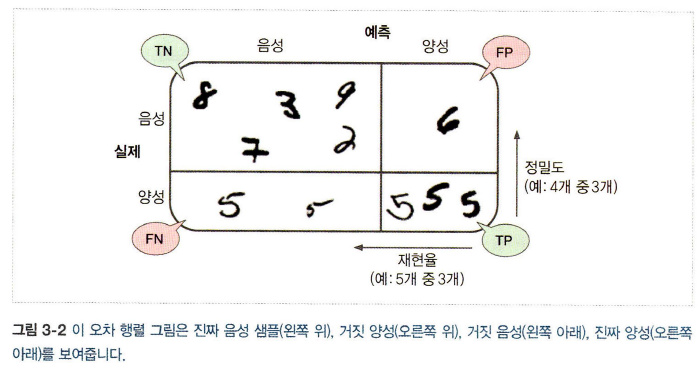

####**정밀도와 재현율**


In [41]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.6603573591762568

In [42]:
recall_score(y_train_5, y_train_pred) # == 4096/(4096+1325)

0.8044641210108836

3. F1점수=정밀도와 재현율의 조화평균


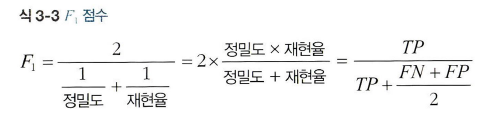

In [ ]:
#f1점수를 계산하려면 f1_score()함수 호출
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

- 정밀도와 재현율이 비슷한 분류기에서는 F1의 점수가 높다. (항상 바람직한 것은 아님)
- 정밀도가 높으면 재현율이 주는 현상을 정밀도/재현율 트레이드 오프라고 함.

####**3.3.4 정밀도/재현율 트레이드 오프**

* SGDClassifier분류기는 결정함수를 사용하여 각 샘플의 점수를 계산한다.
- 사이킷런에서 임곗값을 직접 지정할 수는 없지만 예측에 사용한 점수는 확인할 수 있다.

In [43]:
# predict()메서드 대신 decision_function() 메서드를 호출
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[57392.7316778]
[ True]


In [44]:
#임곘값을 높인다
threshold = 80000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [45]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [46]:
#precision_recall_curve() 함수를 사용해 모든 임곗값에 대한 정밀도와 재현율 계산
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

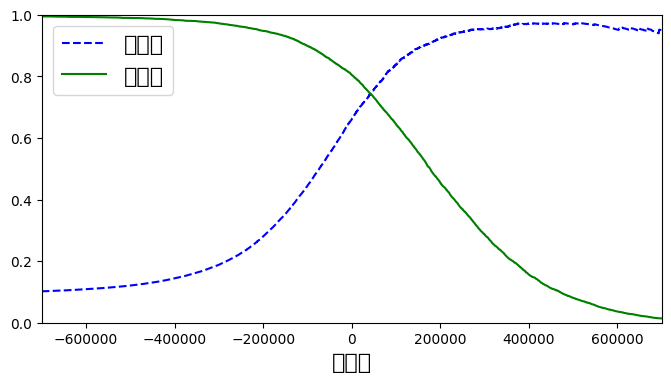

In [48]:
#맷플롯립을 통해 임곗값의 함수로 정밀도와 재현율 그리기
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율")
    plt.xlabel("임계값", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

- 좋은 정밀도/재현율 트레이드오프를 선택하는 다른 방법은 재현율에 대한 정밀도 곡선을 그리는 것

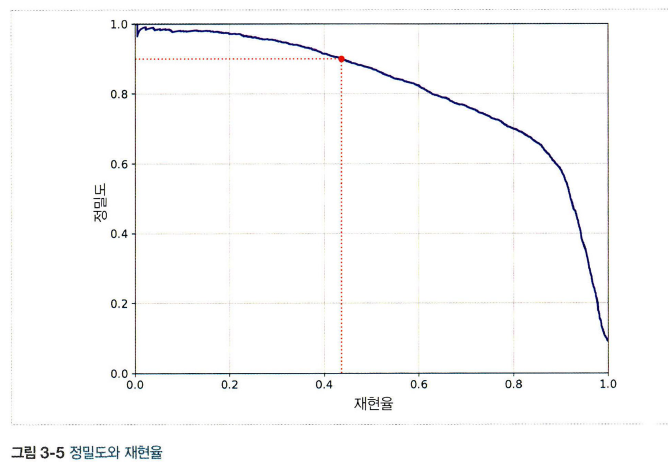

In [49]:
#정밀도90%달성이 목표 - 임곗값이 약 8000이라는 것
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [50]:
# 예측 만들기
y_train_pred_90 = (y_scores > threshold_90_precision)

In [51]:
# 정밀도와 재현율 확인
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9002203336480957
0.5275779376498801


충분히 큰 임곗값을 지정하면 정밀도에 대해 분류기를 쉽게 만들 수 있다. 재현율이 너무 낮으면 높은 정밀도의 분류기는 유용하지 않다.

####**ROC곡선**
- 거짓 양성비율(FPR)에 대한 진짜 양성비율(TPR) 의 곡선이다.
- 민감도(재현율)에 대한 1-특이도 그래프

In [52]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

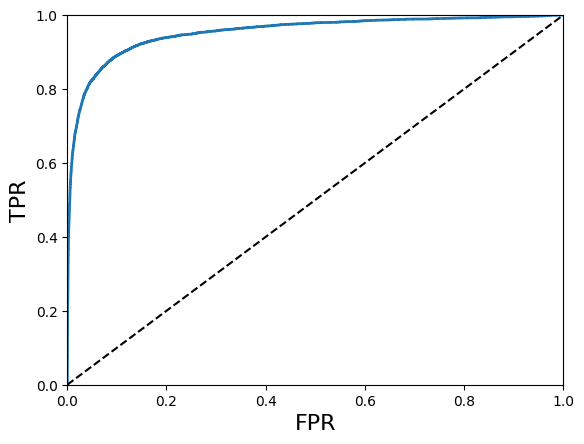

In [53]:
#TPR에 대한 FPR곡선
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=16)
    plt.ylabel('TPR', fontsize=16)

plot_roc_curve(fpr, tpr)
plt.show()

재현율이 높을수록 분류기가 만드는 거짓 양성이 늘어난다. 점선은 완전한 랜덤 분류기의 ROC곡선. 좋은 분류기는 점선에서 멀리 떨어진 것

In [54]:
#곡선 아래의 면적을 측정
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9536789698168869

In [55]:
# RandomForestClassifier를 훈련시켜 SGDClassifier의 ROC곡선과 AUC점수 비교
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [56]:
# roc_curve() 함수는 레이블과 점수 나타냄.
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

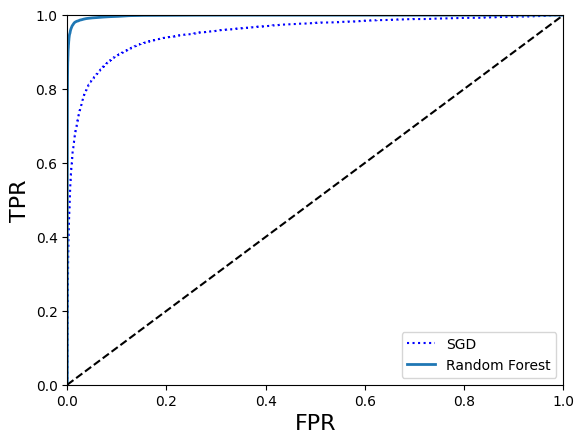

In [57]:
#ROC곡선 그리기
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [58]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

####**다중 분류**
- 둘이상의 클래스 구별
- 이진분류기를 여러개 사용해 다중 클래스를 분류하는 기법도 존재
- OvR: 특정 숫자 하나만 구분하는 이진분류기 10개를 훈련시켜 10개 숫자이미지 분류시스템 형성
- OvO: 각 숫자의 조합마다 이진분류기를 훈련시킴
- 클래스가 N개라면 분류기는 NX(N-1)/2개 필

In [59]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [60]:
# decision_function()메서드를 호출하면 샘플당 10개 점수 반환
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([57392.7316778])

In [61]:
print(np.argmax(some_digit_scores))
print(svm_clf.classes_)
print(svm_clf.classes_[5])

0
[0 1 2 3 4 5 6 7 8 9]
5


In [62]:
#OneVsOneClassifier나 OneVsRestClassifier를 사용- OvO나 OvR를 사용하도록 강제
# SVC기반 OvR전략 사용 다중분류기 만들기
from sklearn.multiclass import OneVsOneClassifier

ovr_clf = OneVsOneClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [63]:
len(ovr_clf.estimators_)

45

In [64]:
# SGDClassifier를 훈련시키기
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([3], dtype=uint8)

In [65]:
sgd_clf.decision_function([some_digit])

array([[-473897.80801197, -644255.86485802, -347352.99430408,
         -30942.4528106 , -560971.15600433,  -42695.14872161,
        -495355.44702264, -327659.64997194, -485909.1798798 ,
        -495629.95766748]])

In [66]:
#SGDClassifier 정확도 확인
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.8684 , 0.85975, 0.85475])

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.906  , 0.9074 , 0.91205])

###**3.5에러분석**


In [68]:
# 오차행렬 살피기
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5734,    2,   26,    9,   11,   45,   42,    9,   41,    4],
       [   1, 6482,   42,   31,    7,   40,    6,    9,  112,   12],
       [  58,   41, 5293,  106,   90,   31,   93,   60,  169,   17],
       [  49,   40,  143, 5322,    4,  236,   37,   57,  150,   93],
       [  25,   25,   33,    9, 5359,    8,   54,   29,   95,  205],
       [  77,   44,   38,  180,   81, 4603,   99,   23,  183,   93],
       [  36,   31,   42,    2,   41,  102, 5617,    3,   44,    0],
       [  31,   26,   73,   34,   57,   14,    3, 5750,   19,  258],
       [  48,  164,   69,  139,   12,  160,   49,   21, 5054,  135],
       [  44,   35,   23,   89,  153,   39,    2,  186,   83, 5295]])

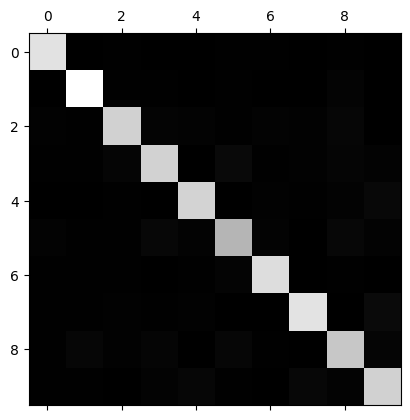

In [69]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [70]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

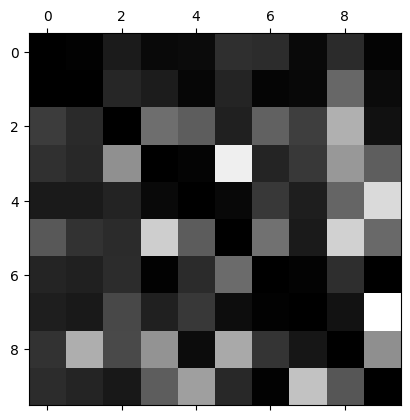

In [71]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

- 행은 실제 클래스, 열은 예측한 클래스
- 오차행렬은 반드시 대칭이 아니라는 점

In [72]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

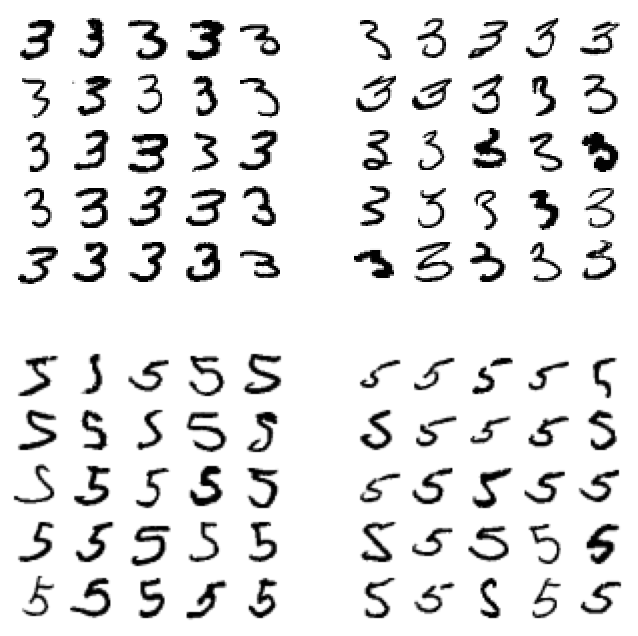

In [73]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

- 선형모델인 SGDClassfier를 사용했기 때문에 모델의 혼동이 생긴 것
- 선형분류기는 클래스마다 픽셀에 가중치를 할당하고 새로운 이미지에 단순히 픽셀 강도의 가중치 합을 클래스의 점수로 계산
- 해결하기 위해 이미지를 중앙에 위치시키고 회전되어 있지 않도록 전처리한다.

###**3.6다중레이블 분류**
- 여러개의 이진 꼬리표를 출력하는 분류 시스템

In [74]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [75]:
knn_clf.predict([some_digit])

array([[False,  True]])

- 다중 레이블 분류기 평가 방법은 많음. 적절 지표는 프로젝트에 따라 다른데, 각 레이블의 F1 점수를 구하고 평균 점수를 계산하는 방법이 있다.

In [81]:
from sklearn.metrics import f1_score

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
print(f1_score(y_multilabel, y_train_knn_pred, average="macro"))

0.976410265560605


###**3.7 다중 출력 분류**
-  다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화

In [77]:
#잡음 제거 시스템
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [78]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary,
               interpolation="nearest")
    plt.axis("off")

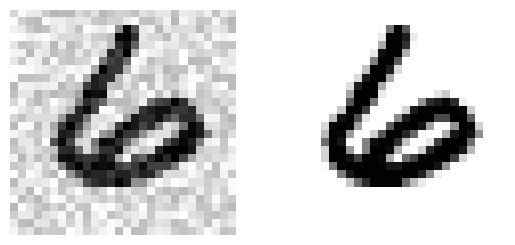

In [79]:
some_index = 5501
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

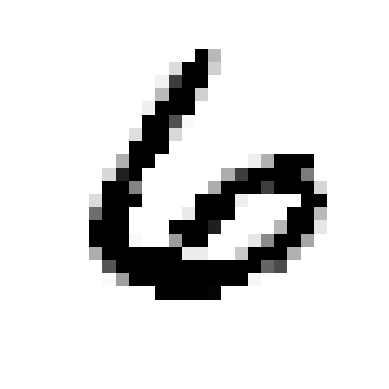

In [80]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)